**PCA 2 (Core) Visualización de Datos con Componentes Principales**

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

1) Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


1.a) Inspección inicial

Primeras filas

In [2]:
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Información general

In [3]:
print("Información General")
df.info()

Información General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Estadísticas del Dataset

In [4]:
print("Estadísticas del Dataset")
df.describe()

Estadísticas del Dataset


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


1.b) Comprobar nulos

In [5]:
print("¿Existen valores nulos")
print(df.isnull().sum())

¿Existen valores nulos
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


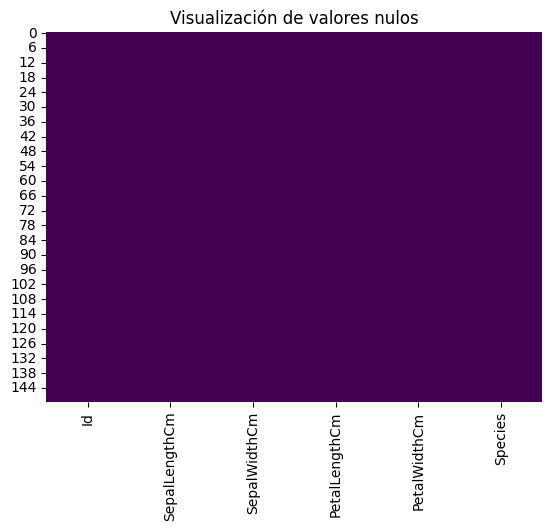

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualización de valores nulos")
plt.show()

1.c) Valores atípicos

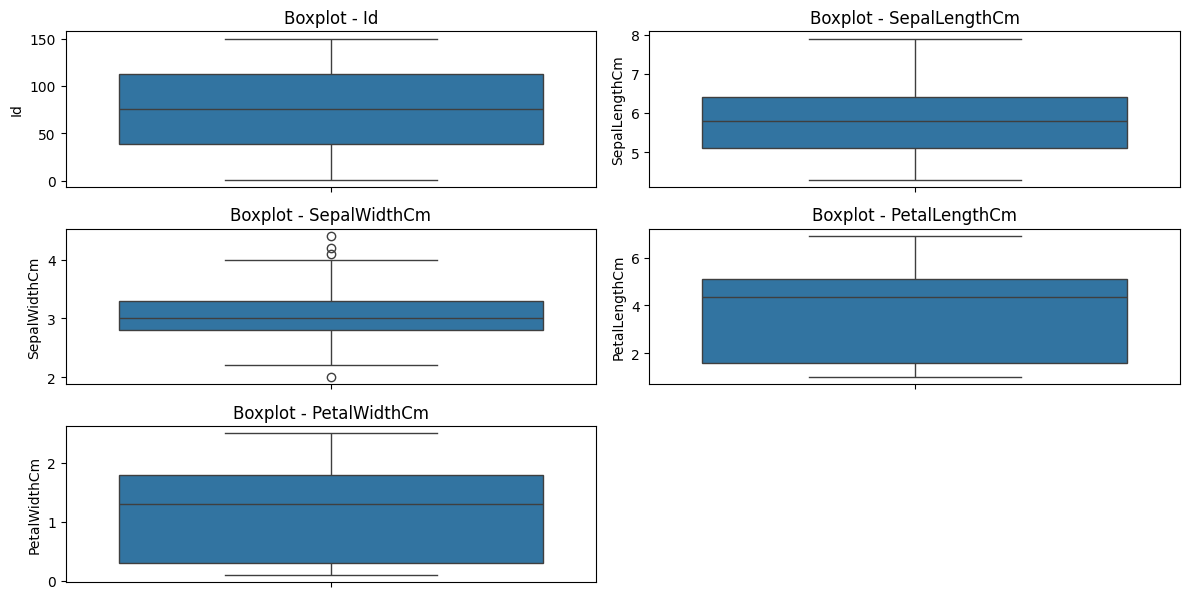

In [7]:
num_columns = df.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

In [8]:
for col in num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Datos después de eliminar outliers (si los había):")
print(df.describe(), "\n")

Datos después de eliminar outliers (si los había):
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  146.000000     146.000000    146.000000     146.000000    146.000000
mean    76.582192       5.856849      3.036986       3.807534      1.219863
std     43.453305       0.834093      0.395145       1.757117      0.760365
min      1.000000       4.300000      2.200000       1.000000      0.100000
25%     40.250000       5.100000      2.800000       1.600000      0.300000
50%     77.500000       5.800000      3.000000       4.400000      1.300000
75%    113.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.000000       6.900000      2.500000 



1.d) Verificación Final

In [9]:
print("¿Existen valores nulos")
print(df.isnull().sum())

¿Existen valores nulos
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


2) Exploración y preprocesamiento de datos:

- Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.

- Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

2.a) Distribución Variables numéricas

Histograma distribución inicial

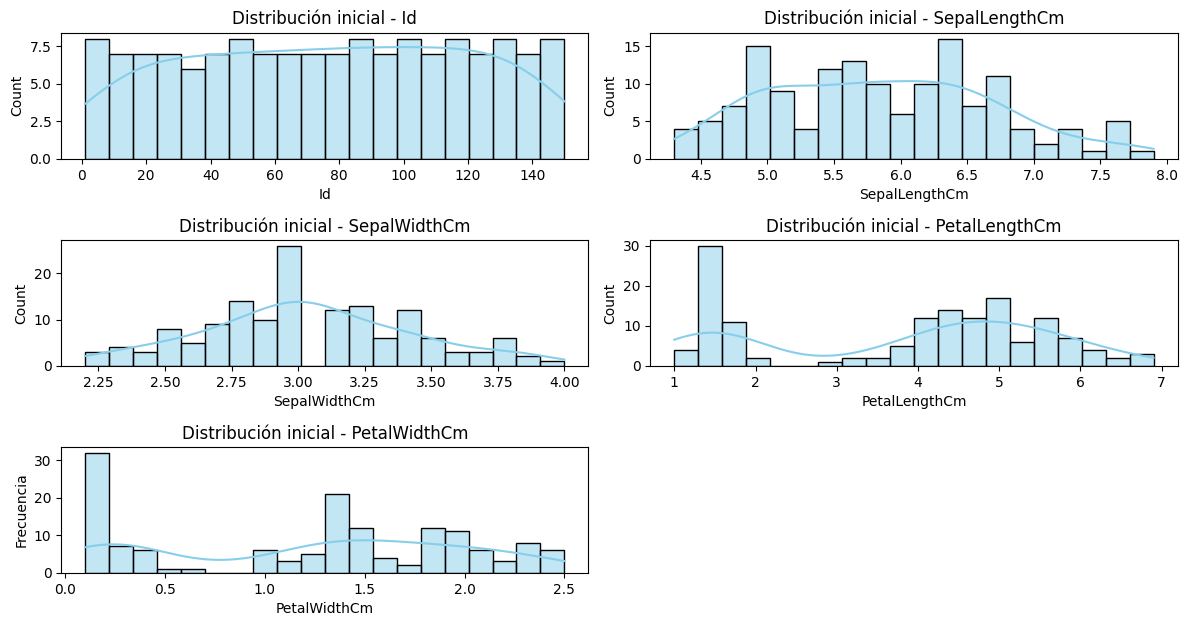

In [10]:
num_columns = df.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, color="skyblue", bins=20)
    plt.title(f"Distribución inicial - {col}")

plt.xlabel(col)
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Gráfico de dispersión

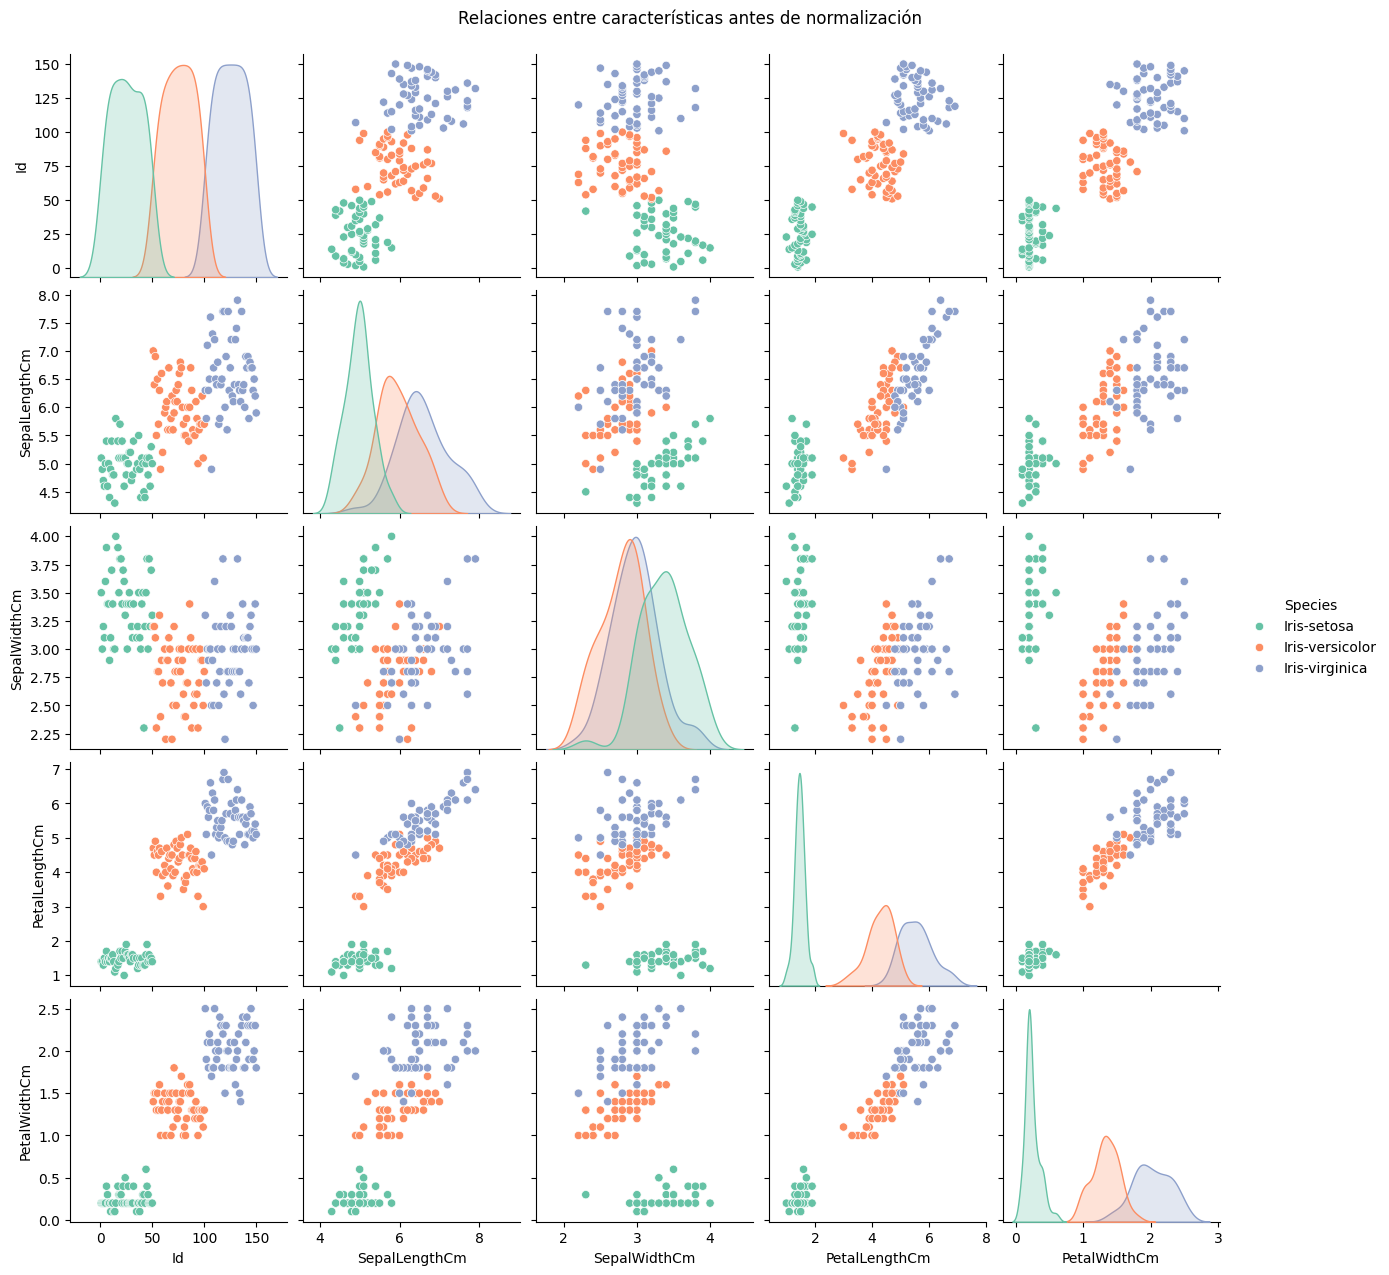

In [11]:
sns.pairplot(df, hue="Species", diag_kind="kde", palette="Set2")
plt.suptitle("Relaciones entre características antes de normalización", y=1.02)
plt.show()

2.b) Normalización numéricas

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[num_columns] = scaler.fit_transform(df[num_columns])

print("Estadísticas de las características después de la normalización:")
print(df_scaled[num_columns].describe(), "\n")

Estadísticas de las características después de la normalización:
                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  1.460000e+02   1.460000e+02  1.460000e+02   1.460000e+02  1.460000e+02
mean   1.460019e-16   7.300097e-16 -7.300097e-17   9.733462e-17 -3.406712e-16
std    1.003442e+00   1.003442e+00  1.003442e+00   1.003442e+00  1.003442e+00
min   -1.745376e+00  -1.872943e+00 -2.125465e+00  -1.603307e+00 -1.477867e+00
25%   -8.389985e-01  -9.105154e-01 -6.018092e-01  -1.260664e+00 -1.213930e+00
50%    2.119442e-02  -6.839165e-02 -9.392398e-02   3.383413e-01  1.057556e-01
75%    8.582950e-01   6.534287e-01  6.679039e-01   7.380925e-01  7.655984e-01
max    1.695395e+00   2.457980e+00  2.445502e+00   1.766024e+00  1.689378e+00 



2.c) Ver distribución

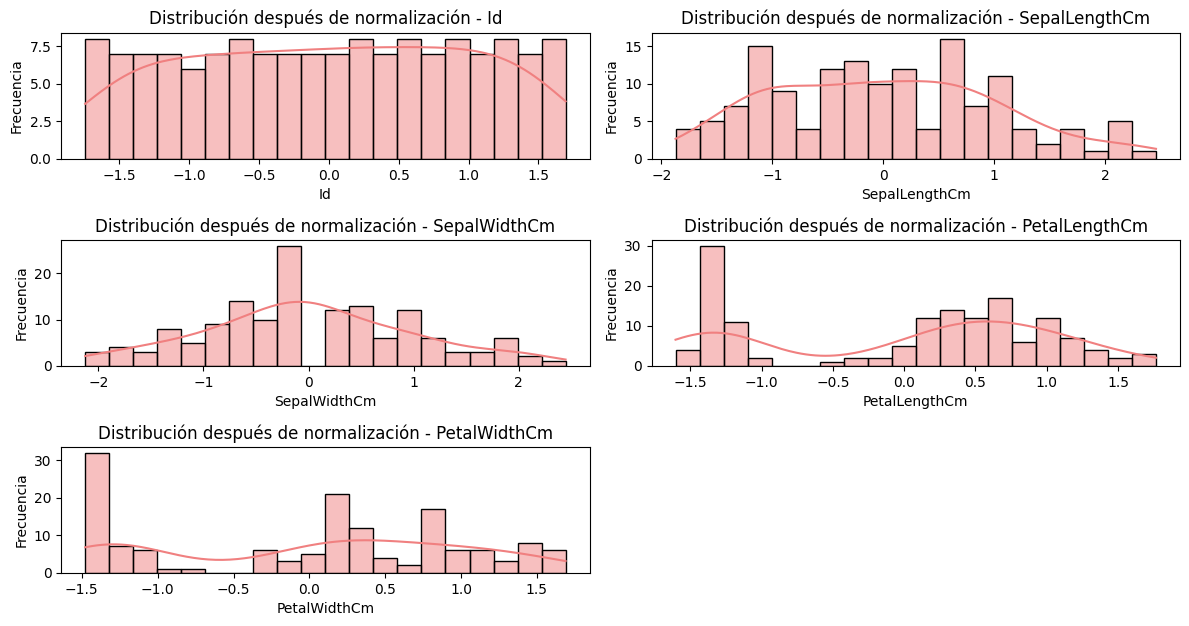

In [13]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df_scaled[col], kde=True, color="lightcoral", bins=20)
    plt.title(f"Distribución después de normalización - {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

2.d) Gráfico de Dispersión

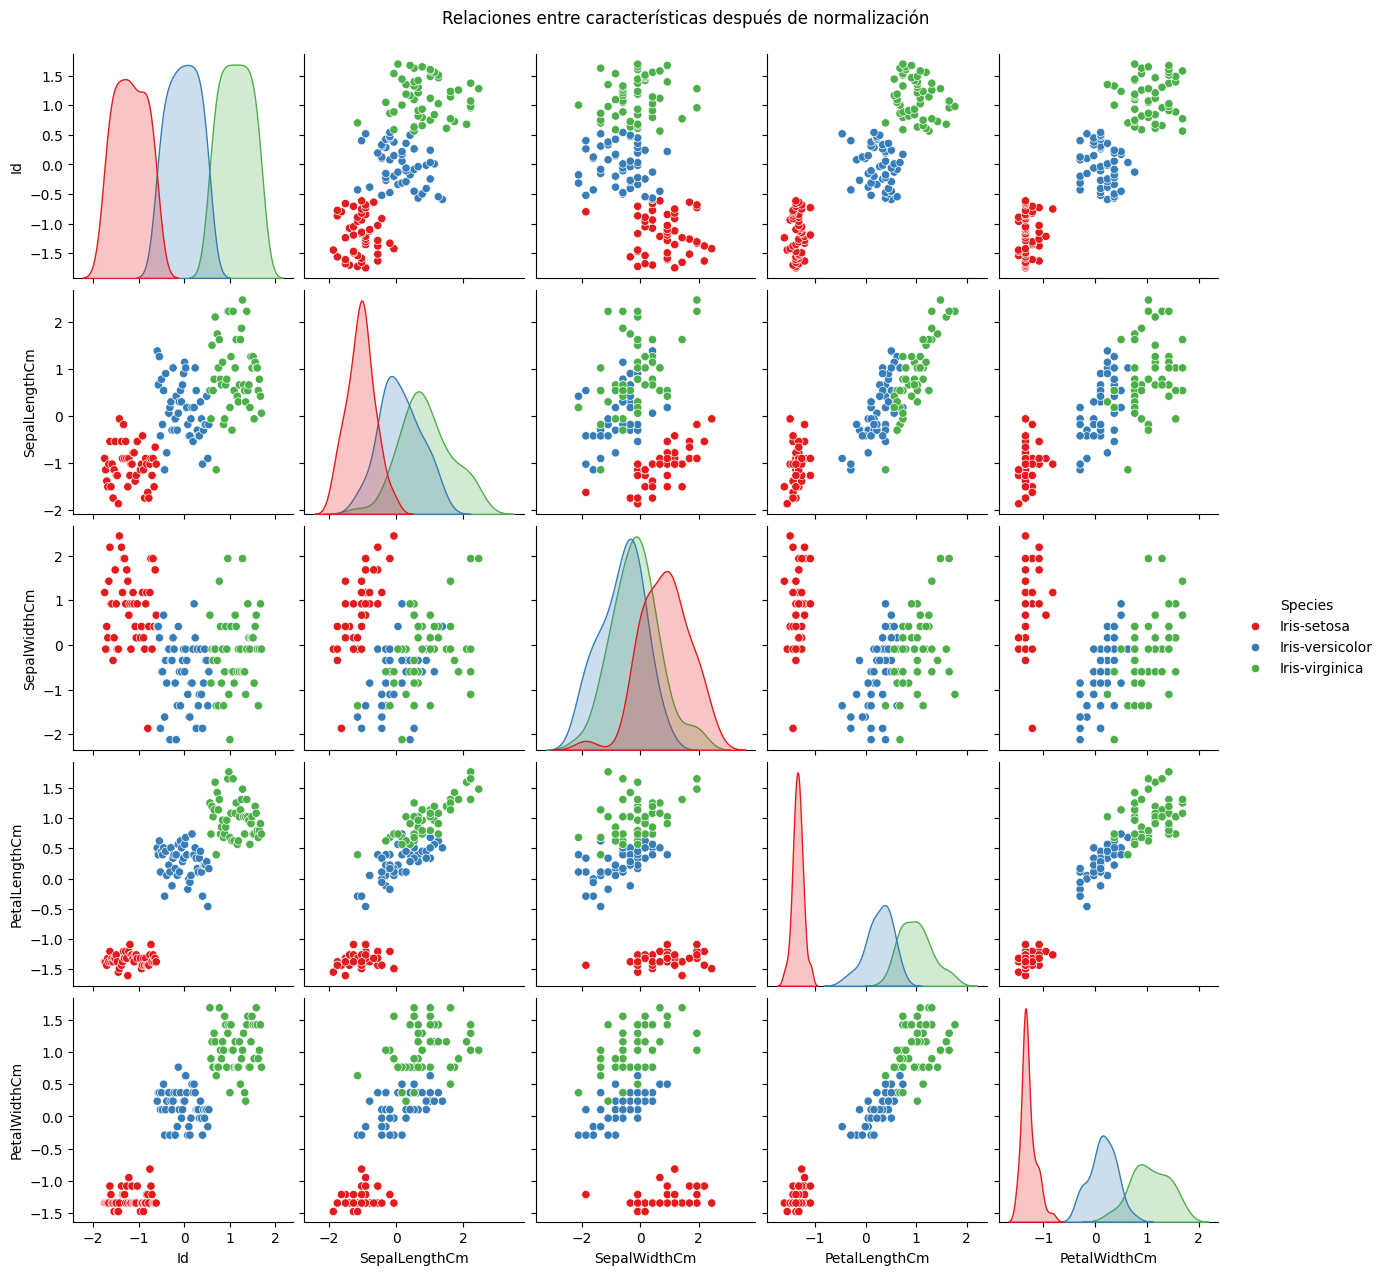

In [14]:
sns.pairplot(df_scaled, hue="Species", diag_kind="kde", palette="Set1")
plt.suptitle("Relaciones entre características después de normalización", y=1.02)
plt.show()

3) Aplicación de PCA:

- Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
- Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

Aplicando Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_scaled['Species_encoded'] = le.fit_transform(df_scaled['Species'])

print("Clases codificadas:", le.classes_)

y = df_scaled['Species_encoded']

Clases codificadas: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


3.a) Aplicar PCA

In [16]:
from sklearn.decomposition import PCA

X = df_scaled.drop(['Species', 'Species_encoded'], axis=1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

3.b) Varianza de Componentes

In [17]:
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Varianza explicada por el primer componente: {explained_variance_ratio[0]:.2f}")
print(f"Varianza explicada por el segundo componente: {explained_variance_ratio[1]:.2f}")
print(f"Varianza total explicada: {sum(explained_variance_ratio):.2%}")

Varianza explicada por el primer componente: 0.75
Varianza explicada por el segundo componente: 0.18
Varianza total explicada: 92.99%


4) Visualización de los componentes principales:

- Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
- Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

4.a) Visualización del PCA con colores por clase

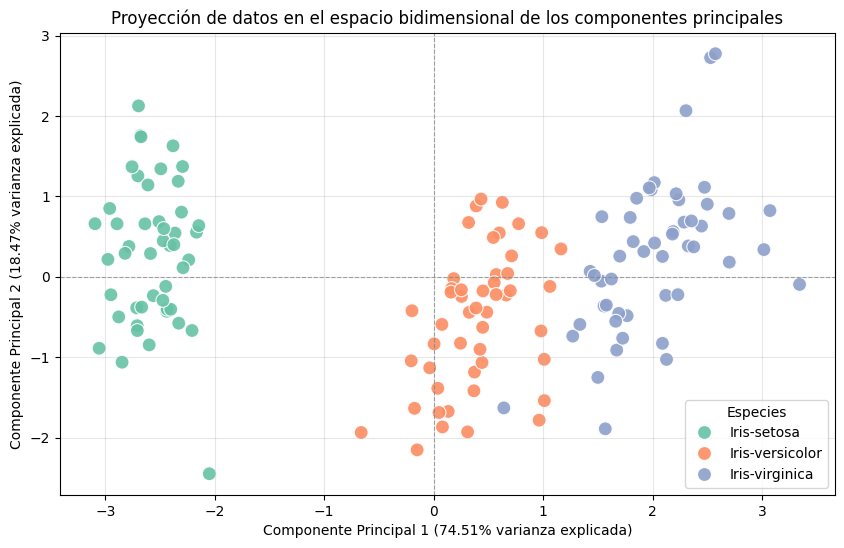

In [18]:
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Species"] = le.inverse_transform(y)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="Species",
    palette="Set2",
    s=100,
    alpha=0.9
)

plt.title("Proyección de datos en el espacio bidimensional de los componentes principales")
plt.xlabel(f"Componente Principal 1 ({explained_variance_ratio[0]:.2%} varianza explicada)")
plt.ylabel(f"Componente Principal 2 ({explained_variance_ratio[1]:.2%} varianza explicada)")

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)

plt.grid(alpha=0.3)
plt.legend(title="Especies")
plt.show()

5) Interpretación de los resultados:

- Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
- Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

5.a) Coeficientes de los componentes principales

In [19]:
componentes_df = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=['PC1', 'PC2']
)

print("Coeficientes de los componentes principales:")
print(componentes_df)

Coeficientes de los componentes principales:
           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1  0.481385       0.452824     -0.222101       0.511208      0.502550
PC2 -0.027455       0.354324      0.930407       0.035077      0.082544
